# Training

In [8]:
%%capture
%pip install -r requirements.txt

In [9]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import all_entanglement_witnesses
import mlflow

In [10]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [11]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7024 - loss: 0.5979 - val_accuracy: 0.7258 - val_loss: 0.5587
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7390 - loss: 0.5289 - val_accuracy: 0.7258 - val_loss: 0.5142
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.7546 - loss: 0.4734 - val_accuracy: 0.7292 - val_loss: 0.4844
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.7493 - loss: 0.4580 - val_accuracy: 0.7250 - val_loss: 0.4697
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.7394 - loss: 0.4472 - val_accuracy: 0.7225 - val_loss: 0.4644
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7502 - loss: 0.4468 - val_accuracy: 0.7367 - val_loss: 0.4648
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7433 - loss: 0.4443 - val_accuracy: 0.7283 - val_loss: 0.4662
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7381 - loss: 0.4446 - va

2024/05/18 15:30:06 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7420 - loss: 0.4605


Successfully registered model 'QuantumStateClassifier-CHSH'.
2024/05/18 15:30:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 1


Model saved in run cc91729d4e604e078f8770ea38f94925


Created version '1' of model 'QuantumStateClassifier-CHSH'.


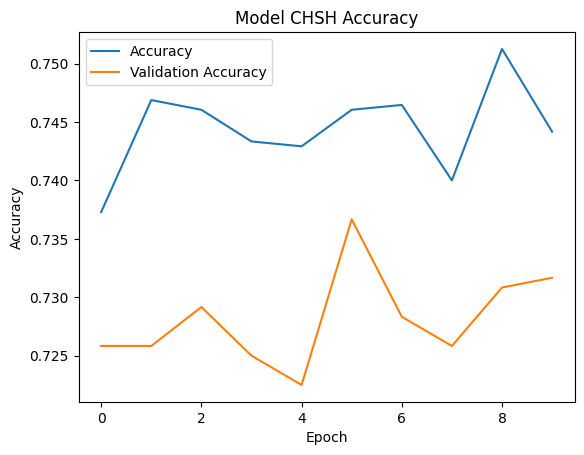

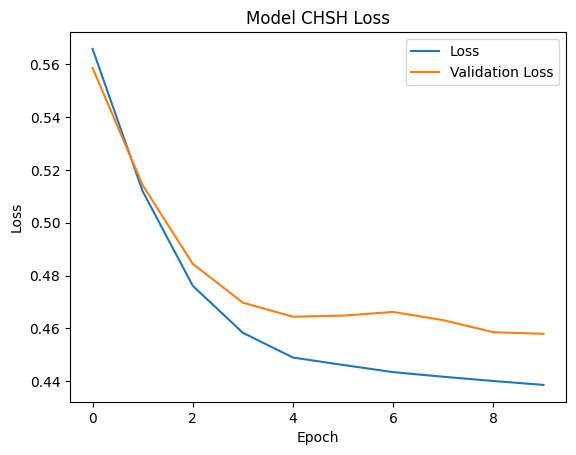

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6703 - loss: 0.6067 - val_accuracy: 0.8267 - val_loss: 0.4171
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8897 - loss: 0.3230 - val_accuracy: 0.9492 - val_loss: 0.1606
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9587 - loss: 0.1310 - val_accuracy: 0.9575 - val_loss: 0.1055
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9759 - loss: 0.0770 - val_accuracy: 0.9783 - val_loss: 0.0839
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9864 - loss: 0.0509 - val_accuracy: 0.9875 - val_loss: 0.0685
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.9904 - loss: 0.0359 - val_accuracy: 0.9933 - val_loss: 0.0621
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9908 - loss: 0.0394 - val_accuracy: 0.9950 - val_loss: 0.0578
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9930 - loss: 0.0286 - va

2024/05/18 15:30:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9940 - loss: 0.0478


Successfully registered model 'QuantumStateClassifier-CONCURRENCE'.
2024/05/18 15:30:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 1


Model saved in run 3a5225d49074462cbc7f9d621c4f5055


Created version '1' of model 'QuantumStateClassifier-CONCURRENCE'.


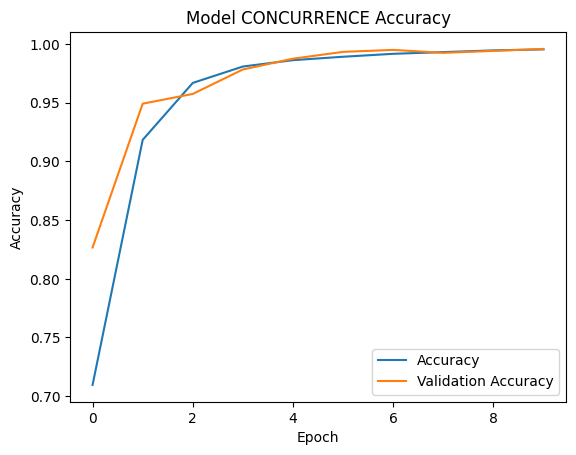

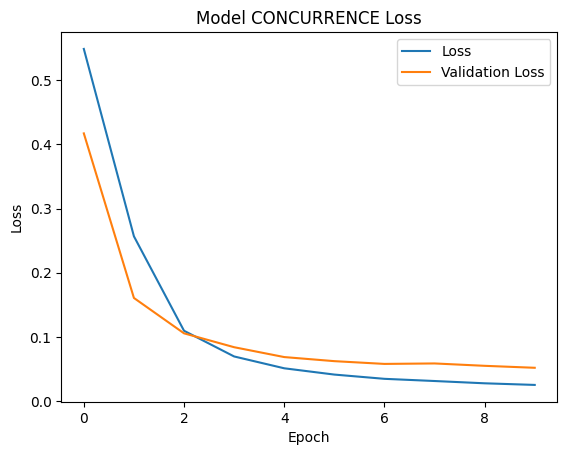

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6291 - loss: 0.6191 - val_accuracy: 0.8692 - val_loss: 0.3852
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9098 - loss: 0.2885 - val_accuracy: 0.9542 - val_loss: 0.1355
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9671 - loss: 0.1102 - val_accuracy: 0.9742 - val_loss: 0.0765
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9821 - loss: 0.0584 - val_accuracy: 0.9850 - val_loss: 0.0509
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9836 - loss: 0.0503 - val_accuracy: 0.9858 - val_loss: 0.0379
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.9942 - val_loss: 0.0320
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9925 - val_loss: 0.0235
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9938 - loss: 0.0205 - va

2024/05/18 15:30:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9953 - loss: 0.0179


Successfully registered model 'QuantumStateClassifier-ENTROPY'.
2024/05/18 15:30:15 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 1


Model saved in run 8eb222dc5ab24c4eaa2a2beba26a888a


Created version '1' of model 'QuantumStateClassifier-ENTROPY'.


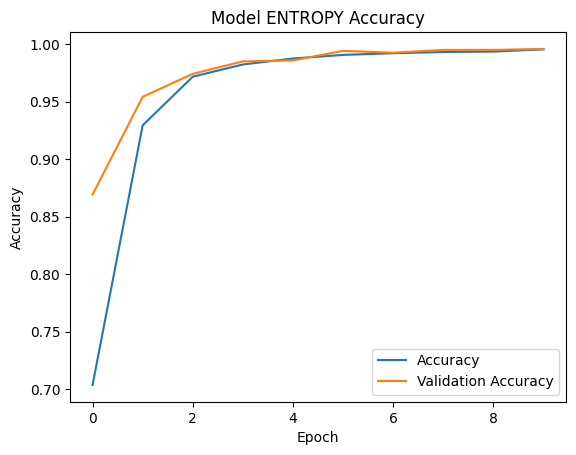

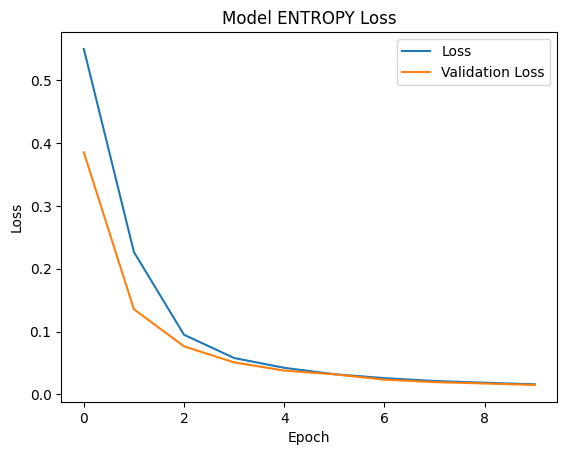

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6729 - loss: 0.6064 - val_accuracy: 0.8300 - val_loss: 0.4188
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8752 - loss: 0.3373 - val_accuracy: 0.9483 - val_loss: 0.1557
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9641 - loss: 0.1250 - val_accuracy: 0.9692 - val_loss: 0.0813
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9807 - loss: 0.0680 - val_accuracy: 0.9858 - val_loss: 0.0575
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.9855 - loss: 0.0469 - val_accuracy: 0.9883 - val_loss: 0.0392
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9924 - loss: 0.0320 - val_accuracy: 0.9950 - val_loss: 0.0360
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9957 - loss: 0.0248 - val_accuracy: 0.9900 - val_loss: 0.0256
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.9943 - loss: 0.0207 - va

2024/05/18 15:30:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9935 - loss: 0.0197


Successfully registered model 'QuantumStateClassifier-NEGATIVITY'.
2024/05/18 15:30:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 1


Model saved in run d19c196ed1be44a2b46fad98b161f257


Created version '1' of model 'QuantumStateClassifier-NEGATIVITY'.


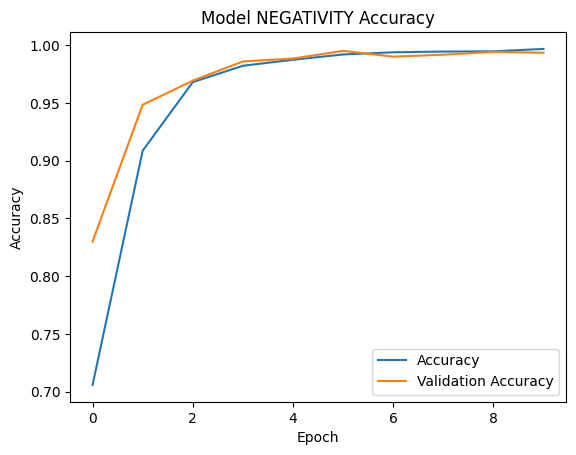

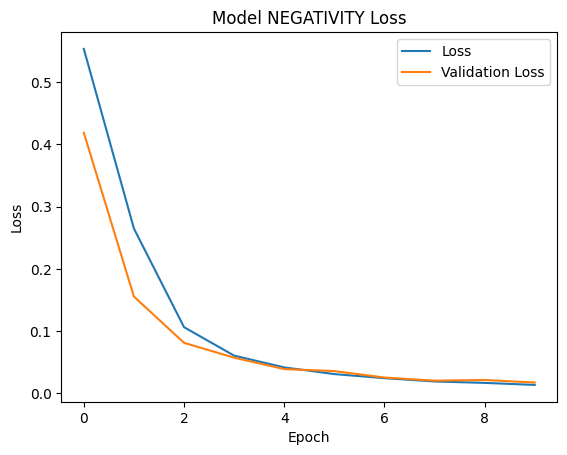

In [12]:
models = {}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in all_entanglement_witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
